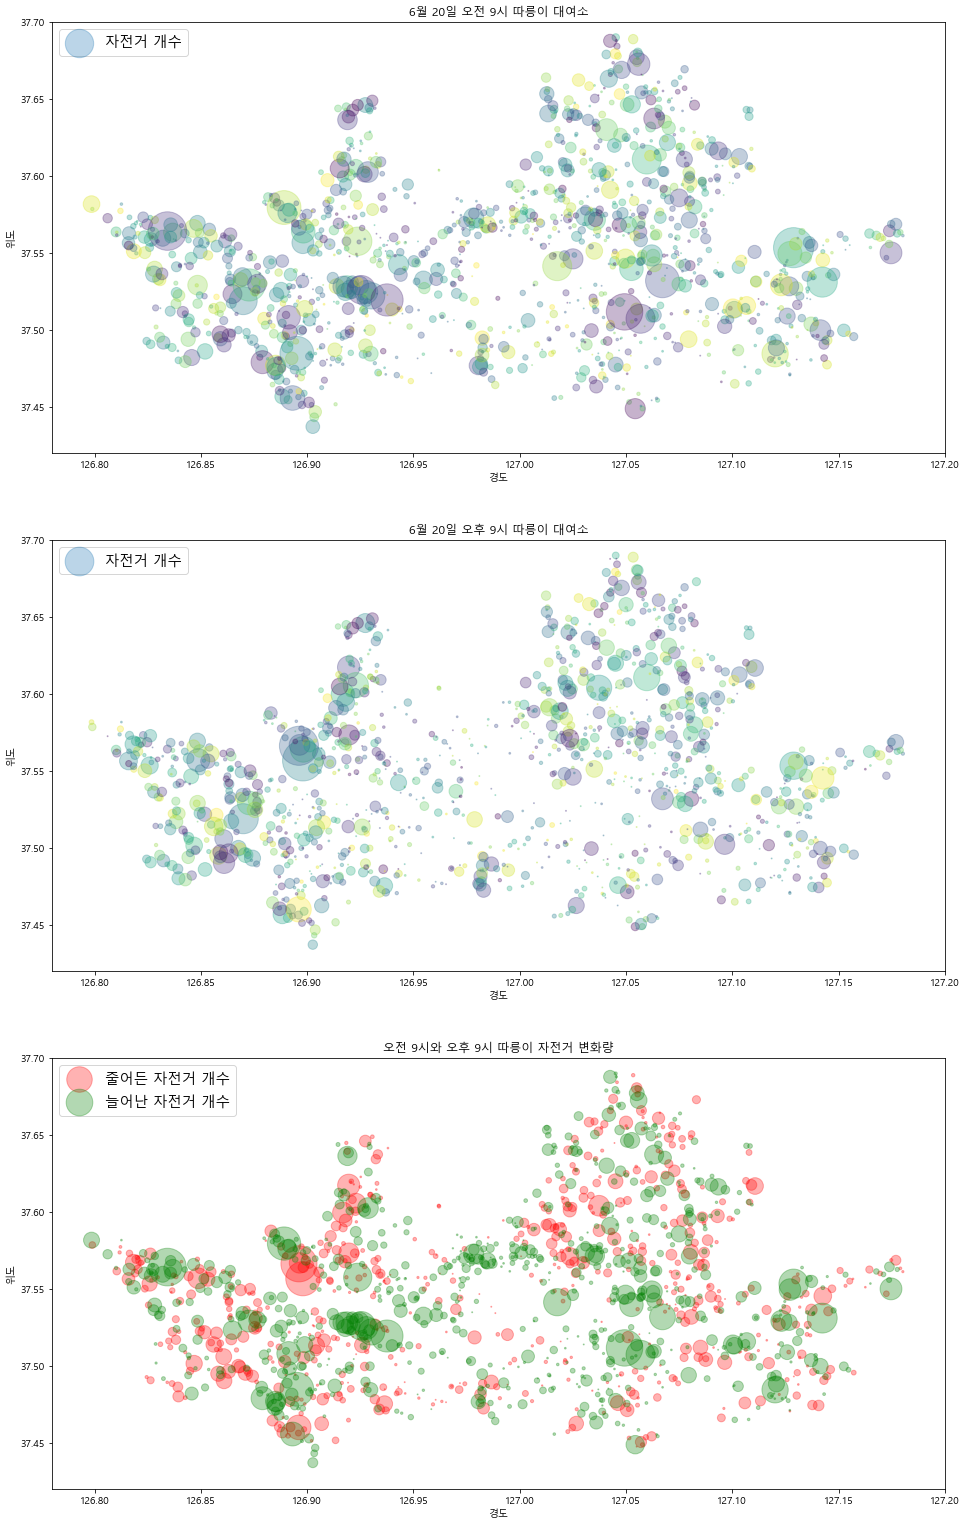

In [176]:
import csv
import matplotlib.pyplot as plt
# from matplotlib import animation
import numpy as np
import os

plt.rc('font', family = "Malgun gothic")

flist = os.listdir("./ddarmist_data")
placeData = {}
for fname in flist:
    with open('./ddarmist_data/' + fname, encoding="utf8") as csv_file:
        csv_data = csv.DictReader(csv_file)
        for i in csv_data:
            stationId = i.get("stationId")
            if placeData.get(stationId) == None:
                placeData[stationId] = []
            i["fname"] = fname
            placeData[stationId].append(i)

for i in placeData.keys():
    tmp = [{"parkingBikeTotCnt": 0} for i in range(len(placeData.keys()))]
    for j in range(len(placeData[i]) - 1):
        tmp[j] = placeData[i][j]
    placeData[i] = tmp

fig = plt.figure(figsize=(16, 27))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

dataX = [float(placeData[name][0]["stationLongitude"]) for name in placeData.keys()]
dataY = [float(placeData[name][0]["stationLatitude"]) for name in placeData.keys()]

dataX = list(filter(lambda x: x != 0, dataX))
dataY = list(filter(lambda x: x != 0, dataY))

dataColors = np.random.rand(len(dataX))

# def animate(i):
#     dataSize = [int(placeData[name][i]["parkingBikeTotCnt"]) ** 2 for name in placeData.keys()]
#     nowTime = dict(placeData[list(placeData.keys())[0]][i])["fname"]

#     ax.clear()
#     ax.set(xlim=[126.78, 127.20], ylim=[37.42, 37.70], title=nowTime)
#     ax.scatter(dataX, dataY, s=dataSize, c=dataColors, alpha=0.3)


# anim = animation.FuncAnimation(fig, animate, interval=10)

# 첫번째 그래프
timeIndex = 262
dataSize1 = [int(placeData[name][timeIndex]["parkingBikeTotCnt"])**1.75 for name in placeData.keys()]

nowTime = dict(placeData[list(placeData.keys())[0]][timeIndex])["fname"]
ax1.set(xlim=[126.78, 127.20], ylim=[37.42, 37.70], title="6월 20일 오전 9시 따릉이 대여소",xlabel="경도",ylabel="위도")
ax1.scatter(dataX, dataY, s=dataSize1, c=dataColors, alpha=0.3,label="자전거 개수")
ax1.legend(loc='upper left',fontsize='x-large')

# 두번째 그래프
timeIndex = 333
dataSize2 = [int(placeData[name][timeIndex]["parkingBikeTotCnt"])**1.75 for name in placeData.keys()]

nowTime = dict(placeData[list(placeData.keys())[0]][timeIndex])["fname"]
ax2.set(xlim=[126.78, 127.20], ylim=[37.42, 37.70], title="6월 20일 오후 9시 따릉이 대여소",xlabel="경도",ylabel="위도")
ax2.scatter(dataX, dataY, s=dataSize2, c=dataColors, alpha=0.3,label="자전거 개수")
ax2.legend(loc='upper left',fontsize='x-large')

# 세번째 그래프
dataSize3 = [int(dataSize2[i])-int(dataSize1[i]) for i in range(len(dataX))]
redMarkerX = []
redMarkerY = []
redMarkerSize = []
greenMarkerX = []
greenMarkerY = []
greenMarkerSize = []

for (idx,data) in enumerate(dataSize3):
    if data > 0:
        redMarkerX.append(dataX[idx])
        redMarkerY.append(dataY[idx])
        redMarkerSize.append(abs(dataSize3[idx]))
    else:
        greenMarkerX.append(dataX[idx])
        greenMarkerY.append(dataY[idx])
        greenMarkerSize.append(abs(dataSize3[idx]))
ax3.set(xlim=[126.78, 127.20], ylim=[37.42, 37.70], title="오전 9시와 오후 9시 따릉이 자전거 변화량",xlabel="경도",ylabel="위도")
ax3.scatter(redMarkerX, redMarkerY, s=redMarkerSize, c='red', alpha=0.3,label="줄어든 자전거 개수")
ax3.scatter(greenMarkerX, greenMarkerY, s=greenMarkerSize, c='green', alpha=0.3,label="늘어난 자전거 개수")
ax3.legend(loc='upper left',fontsize='x-large')

plt.show()

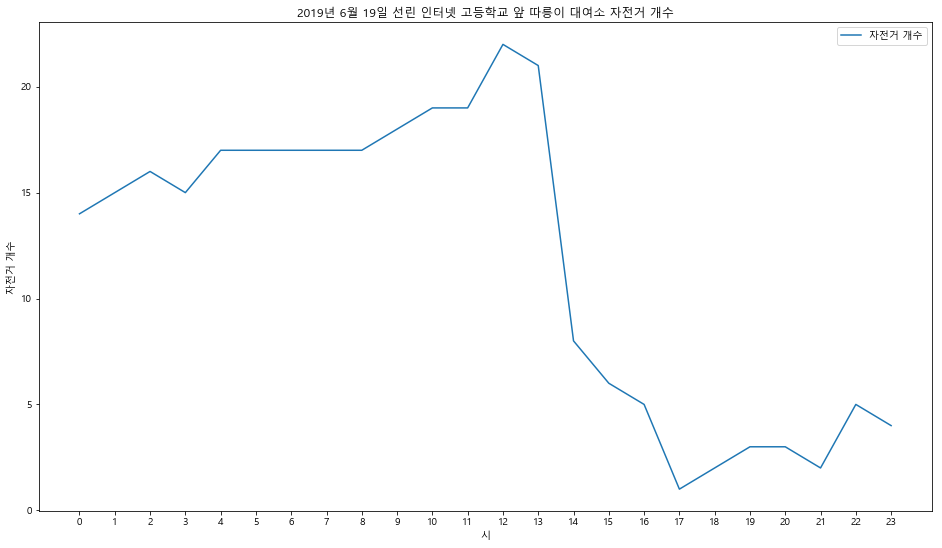

In [178]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rc('font', family = "Malgun gothic")

flist = os.listdir("./ddarmist_data")[66:210:6]
sunrinDDarmistData = []
sunrinDDarmistTime = []
for idx, fname in enumerate(flist):
    with open('./ddarmist_data/' + fname, encoding="utf8") as csv_file:
        csv_data = csv.DictReader(csv_file)
        for i in csv_data:
            if i["stationId"] == "ST-438":
                sunrinDDarmistData.append(int(i["parkingBikeTotCnt"]))
                sunrinDDarmistTime.append(int(fname[11:13]))
                break

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.set(title="2019년 6월 19일 선린 인터넷 고등학교 앞 따릉이 대여소 자전거 개수",xlabel="시",ylabel="자전거 개수")
ax.plot(range(len(sunrinDDarmistData)),sunrinDDarmistData,label = "자전거 개수")
plt.xticks(range(len(sunrinDDarmistData)),sunrinDDarmistTime)
plt.legend()
plt.show()